# Find p-values of regression model using sklearn

P Value is a statistical test that determines the probability of extreme results of the statistical hypothesis test.

1. Regression - Linear Regression is a supervised learning algorithm used for continuous variables. It is the Linear relationship between the dependent and independent variable, where the dependent variable is the response variable denoted as "y" and the independent variable is denoted as "x". y = mx + c.

2. P-Value is a statistical test that determines the probability of extreme results of the statistical hypothesis test, taking the Null Hypothesis to be correct.

In [ ]:
# Step:1 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
d1 = {'Hours': {0: 2.5,
  1: 5.1,
  2: 3.2,
  3: 8.5,
  4: 3.5,
  5: 1.5,
  6: 9.2,
  7: 5.5,
  8: 8.3,
  9: 2.7,
  10: 7.7,
  11: 5.9,
  12: 4.5,
  13: 3.3,
  14: 1.1,
  15: 8.9,
  16: 2.5,
  17: 1.9,
  18: 6.1,
  19: 7.4,
  20: 2.7,
  21: 4.8,
  22: 3.8,
  23: 6.9,
  24: 7.8},
 'Scores': {0: 21,
  1: 47,
  2: 27,
  3: 75,
  4: 30,
  5: 20,
  6: 88,
  7: 60,
  8: 81,
  9: 25,
  10: 85,
  11: 62,
  12: 41,
  13: 42,
  14: 17,
  15: 95,
  16: 30,
  17: 24,
  18: 67,
  19: 69,
  20: 30,
  21: 54,
  22: 35,
  23: 76,
  24: 86}}
df1 = pd.DataFrame(d1)

In [ ]:
# [(df['Hours'],df['Scores']) for (_, row) in  df.iterrows()]

In [ ]:
df.shape

(25, 2)

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


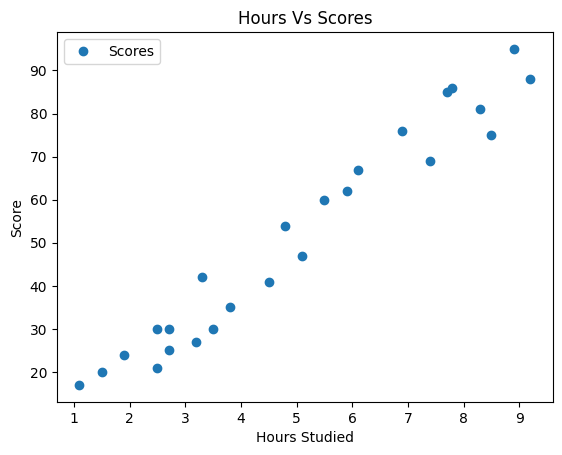

In [ ]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours Vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
chi2(X, y)

(array([30.42027135]), array([0.10860225]))

In [ ]:
scores, pvalue = chi2(X,y)
pvalue

array([0.10860225])

# P-values in Machine Learning

In [ ]:
# !pip install statsmodels
# !pip install mlxtend

In [ ]:
import pandas as pd
insurance_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split
X = insurance_df[['bmi', 'age', 'children']]
y = insurance_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import the stats models API and fit our model to our training data. The result is a table of statistical metrics summarizing our model. Here we are only interested in the p-values column, though it also provides other metrics such as R-squared, t-test, and standard error:

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
linear_reg_model = sm.OLS(y_train, X_train)
linear_reg_model = linear_reg_model.fit()
print(linear_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     43.86
Date:                Tue, 02 May 2023   Prob (F-statistic):           9.94e-27
Time:                        06:22:04   Log-Likelihood:                -11507.
No. Observations:                1070   AIC:                         2.302e+04
Df Residuals:                    1066   BIC:                         2.304e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6118.0462   1968.214     -3.108      0.0

We see that the p-values <0.05 for age, BMI, and the number of children. With this, we have evidence against the null hypothesis, which states that there is no relationship between our inputs and output.

# P-values for Logistic Regression Coefficients
We will use p-values to test the following:

## Alternative Hypothesis (H1): The features tenure, monthly charges, and tenure_squared are important for predicting churn.

## Null Hypothesis (H0): The features tenure, monthly charges, and tenure_squared have no relationship to churn.

We can do something similar for a logistic regression model. Let’s read our churn data into a data frame, generate coded churn labels, and display the first five rows:

In [ ]:
import numpy as np
churn_df = pd.read_csv("https://raw.githubusercontent.com/navdeep-G/customer-churn/master/data/TelcoChurn.csv")
churn_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_df['Churn'] = np.where(churn_df['Churn']=='Yes', 1, 0)

In [ ]:
X = churn_df[['tenure', 'MonthlyCharges']]
X.loc[:,'tenure_squared'] = [x**2 for x in list(churn_df['tenure'])]
y = churn_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-12-4b17141fcbad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'tenure_squared'] = [x**2 for x in list(churn_df['tenure'])]


In [ ]:
X_train = sm.add_constant(X_train)
log_reg_model = sm.Logit(y_train, X_train)
log_reg_model = log_reg_model.fit()
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.458122
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5630
Method:                           MLE   Df Model:                            3
Date:                Tue, 02 May 2023   Pseudo R-squ.:                  0.2084
Time:                        06:25:51   Log-Likelihood:                -2581.1
converged:                       True   LL-Null:                       -3260.7
Covariance Type:            nonrobust   LLR p-value:                1.923e-294
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6265      0.102    -16.021      0.000      -1.826      -1.428
tenure           

The p-values < 0.05 gives evidence to reject the null hypothesis (there is no relationship between input & output).

# P-values for comparing Random Forest Regression Models
## Alternative Hypothesis (H1): There is a real difference in model performance.

## Null Hypothesis (H0): There is no difference in model performance.

Suppose we’d like to compare two random forest regression models. We can use P-values to give evidence for rejecting the null hypothesis. Here, the null hypothesis would be that model performance does not differ between the models. Let’s build one model using default random forest parameters, and a second using n_estimators =5 and a max_depth =5. Let’s generate predictions for each on the test set:



In [ ]:
from sklearn.ensemble import RandomForestRegressor
X = insurance_df[['bmi', 'age', 'children']]
y = insurance_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model1 = RandomForestRegressor(random_state=42)
rf_model1.fit(X_train, y_train)
y_pred1 = rf_model1.predict(X_test)

rf_model2 = RandomForestRegressor(n_estimators= 50, max_depth=50, random_state=42)
rf_model2.fit(X_train, y_train)
y_pred2 = rf_model2.predict(X_test)

In mlxtend to generate our p-value. We pass both estimators and parameter values as well as the training data

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
_, p_value = paired_ttest_5x2cv(estimator1=rf_model1, estimator2=rf_model2, scoring='neg_mean_squared_error', X=X_train, y=y_train, random_seed=42)
if p_value < 0.05:
    print(f"P-value of {p_value} give evidence that model difference is significant")
else:
    print(f"P-value of {p_value} give evidence that model difference is not significant")

P-value of 0.33466026017280154 give evidence that model difference is not significant


We see that we don’t have evidence to reject the null hypothesis here. This means that a difference in model performance may be due to chance.

# P-values for comparing different ML algorithms
Let’s compare our random forest model with default parameters to our linear regression model:

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model1 = LinearRegression()
lr_model1.fit(X_train, y_train)
_, p_value = paired_ttest_5x2cv(estimator1=rf_model1, estimator2=lr_model1, scoring='neg_mean_squared_error', X=X_train, y=y_train, random_seed=42)
if p_value < 0.05:
    print(f"P-value of {p_value} give evidence that model difference is significant")
else:
    print(f"P-value of {p_value} give evidence that model difference is not significant")

P-value of 0.0028342074337569917 give evidence that model difference is significant


We see that we have evidence to reject the null hypothesis here since p <0.05. This means that a difference in model performance is unlikely due to chance.

we calculated p-values to compare random forest and linear regression models.

Many statistical libraries, including SciPy and StatsModels, provide Python code examples for hypothesis testing. For example, to run a one-sample t-test in SciPy, use the following code

# Null and Alternative Hypotheses:

In [ ]:
# Null Hypothesis: Average height of students in a school is 5 feet
# Alternative Hypothesis: Average height of students in a school is greater than 5 feet

import numpy as np
from scipy.stats import ttest_1samp

heights = [5.1, 5.3, 5.5, 5.2, 5.7, 5.6, 5.4, 5.5, 5.3, 5.5]
mu = 5 # Population mean height
alpha = 0.05 # Significance level

t_statistic, p_value = ttest_1samp(heights, mu)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t-statistic: 6.997225525059449
p-value: 6.344142530405409e-05
Reject null hypothesis


# P-Value:

In [ ]:


import numpy as np
from scipy.stats import ttest_1samp

heights = [5.1, 5.3, 5.5, 5.2, 5.7, 5.6, 5.4, 5.5, 5.3, 5.5]
mu = 5 # Population mean height
alpha = 0.05 # Significance level

t_statistic, p_value = ttest_1samp(heights, mu)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 6.997225525059449
p-value: 6.344142530405409e-05


# Type I and Type II Errors:

In [ ]:


import numpy as np
from scipy.stats import ttest_ind

group1 = [10, 11, 13, 12, 14]
group2 = [12, 10, 15, 13, 11]
alpha = 0.05

t_statistic, p_value = ttest_ind(group1, group2)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t-statistic: -0.17960530202677424
p-value: 0.8619282156106923
Fail to reject null hypothesis


In [ ]:
from scipy import stats

# Sample of blood pressure measurements
bp = [130, 135, 125, 140, 128, 132, 138, 130, 136, 129]

# One-sample t-test
stats.ttest_1samp(bp, popmean=120)

TtestResult(statistic=8.128068785597613, pvalue=1.9492773360422643e-05, df=9)

# Here is an example of calculating a confidence interval for the mean using Python:

In [ ]:

import numpy as np
from scipy.stats import norm

# Sample data
data = [10.2, 9.5, 8.7, 9.9, 11.1, 8.5, 10.3, 9.8]

# Sample mean and standard deviation
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

# Level of confidence
conf_level = 0.95

# Degrees of freedom
df = len(data) - 1

# Critical value
crit_val = norm.ppf((1 + conf_level) / 2)

# Margin of error
moe = crit_val * sample_std / np.sqrt(len(data))

# Confidence interval
conf_int = (sample_mean - moe, sample_mean + moe)

print("Confidence interval: ", conf_int)

# Output
# Confidence interval: (8.542586331906024, 10.757413668093976)

Confidence interval:  (9.159682125444172, 10.340317874555828)
